In [42]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
athlete = pd.read_csv("athlete_events.csv")

regions = pd.read_csv("noc_regions.csv")

In [13]:
athlete.head(2)
athlete.info() 
athlete.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [9]:
regions.head(2)
regions.info()
regions.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


NOC         0
region      3
notes     209
dtype: int64

In [ ]:
#Joining the dataframes

In [17]:
merged = pd.merge(athlete, regions, on = 'NOC', how = 'left')
merged.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [ ]:
#Distribution of the age of medalists

In [21]:
Gold = merged[(merged.Medal == 'Gold')]
Silver = merged[(merged.Medal == 'Silver')]
Bronze = merged[(merged.Medal == 'Bronze')]

In [23]:
Gold.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN


In [29]:
Gold.isnull().any()

ID        False
Name      False
Sex       False
Age       False
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [27]:
Gold = Gold[np.isfinite(Gold['Age'])]

Text(0.5, 1.0, 'Distribution of Gold Medals')

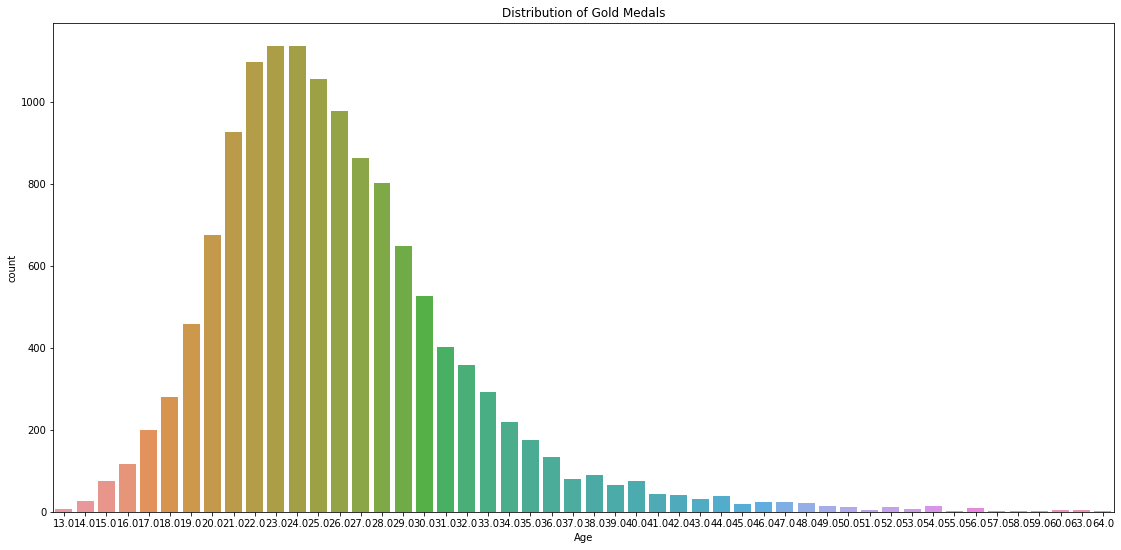

In [54]:
plt.figure(figsize=(19, 9))
plt.tight_layout()
sns.countplot(Gold['Age'])
plt.title('Distribution of Gold Medals')

In [66]:
Gold['ID'][Gold['Age'] > 50].count()
GoldSport = Gold['Sport'][Gold['Age'] > 50]

Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

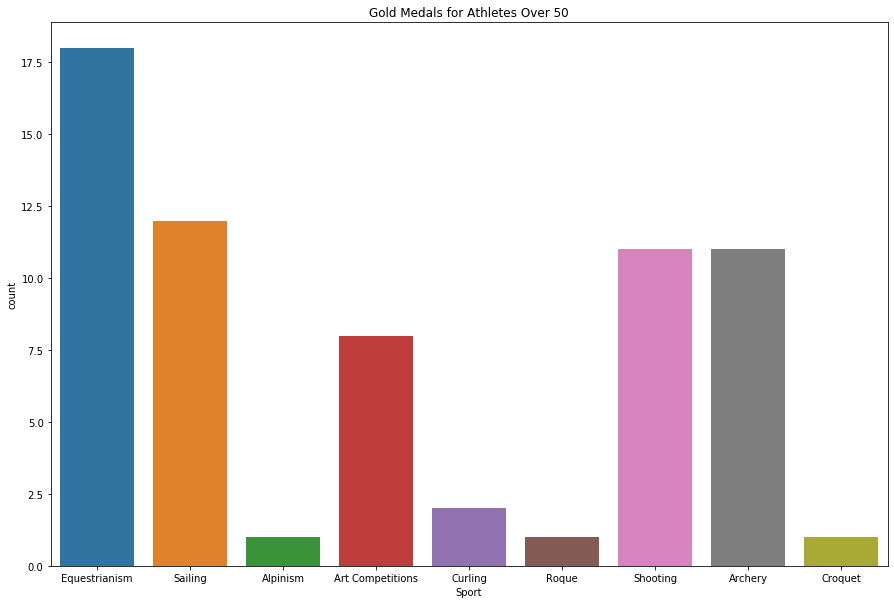

In [67]:
plt.figure(figsize = (15, 10))
plt.tight_layout()
sns.countplot(GoldSport)
plt.title('Gold Medals for Athletes Over 50')

In [32]:
Silver.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway,NaN
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver,Norway,NaN


In [35]:
Silver.isnull().any()

ID        False
Name      False
Sex       False
Age       False
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [34]:
Silver = Silver[np.isfinite(Silver['Age'])]

Text(0.5, 1.0, 'Distribution of Silver Medals')

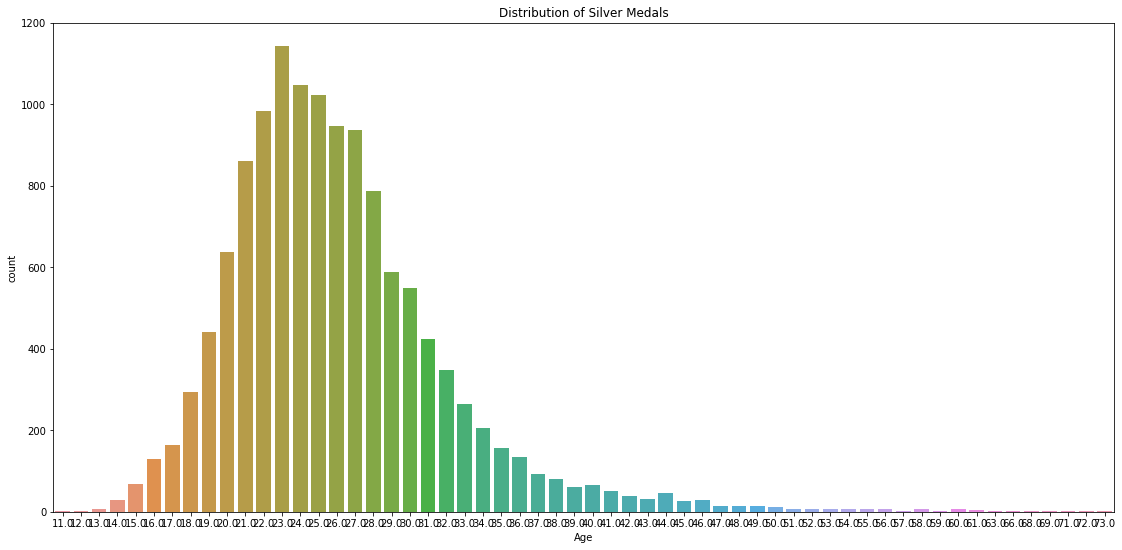

In [55]:
plt.figure(figsize=(19, 9))
plt.tight_layout()
sns.countplot(Silver['Age'])
plt.title('Distribution of Silver Medals')

In [68]:
Silver['ID'][Silver['Age'] > 50].count()
SilverSport = Silver['Sport'][Silver['Age'] > 50]

Text(0.5, 1.0, 'Silver Medals for Athletes Over 50')

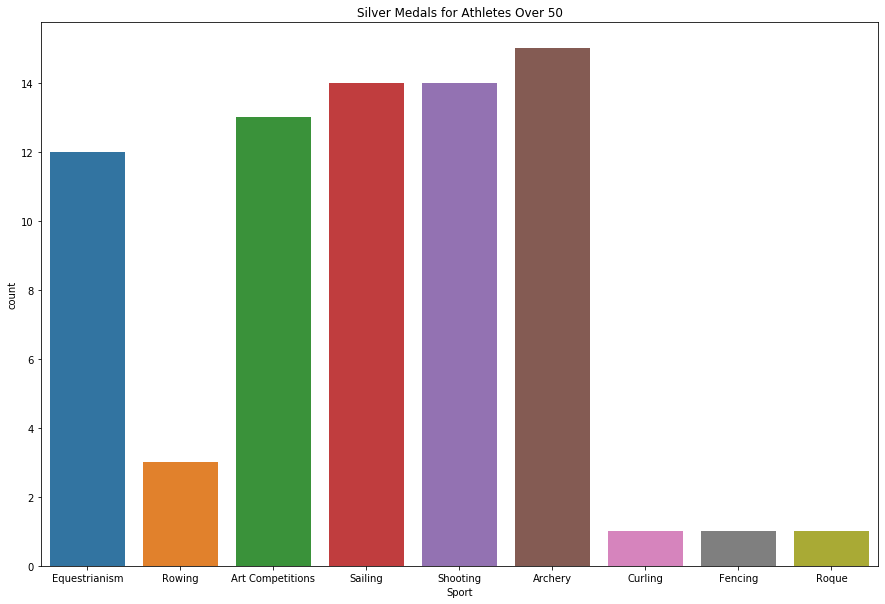

In [69]:
plt.figure(figsize = (15, 10))
plt.tight_layout()
sns.countplot(SilverSport)
plt.title('Silver Medals for Athletes Over 50')

In [25]:
Bronze.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN


In [36]:
Bronze.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [38]:
Bronze = Bronze[np.isfinite(Bronze['Age'])]

In [40]:
Bronze.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN


Text(0.5, 1.0, 'Distribution of Bronze Medals')

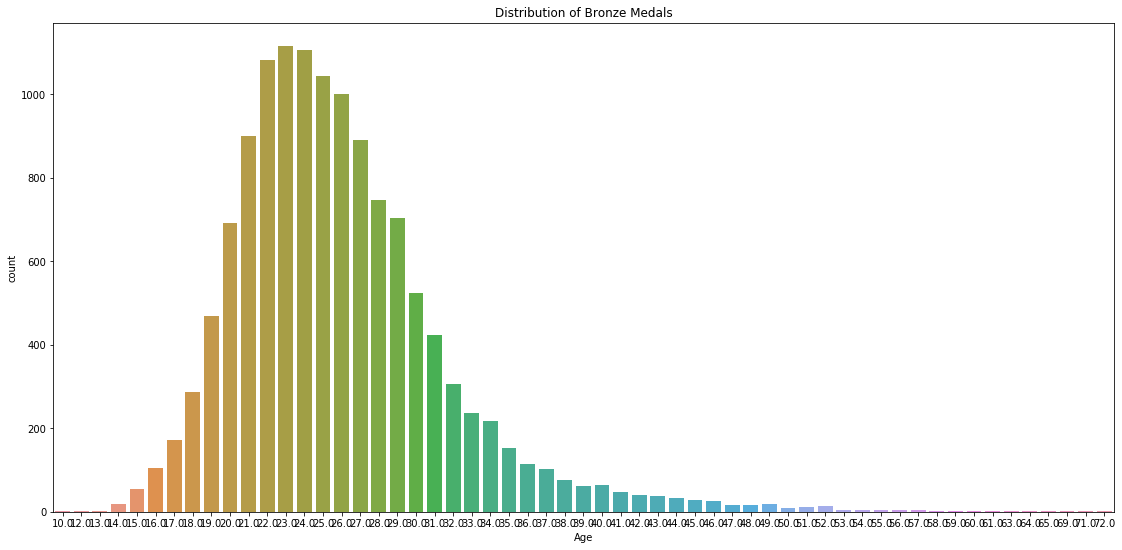

In [56]:
plt.figure(figsize=(19, 9))
plt.tight_layout()
sns.countplot(Bronze['Age'])
plt.title('Distribution of Bronze Medals')

In [70]:
Bronze['ID'][Bronze['Age'] > 50].count()
BronzeSport = Bronze['Sport'][Bronze['Age'] > 50]

Text(0.5, 1.0, 'Bronze Medals for Athletes Over 50')

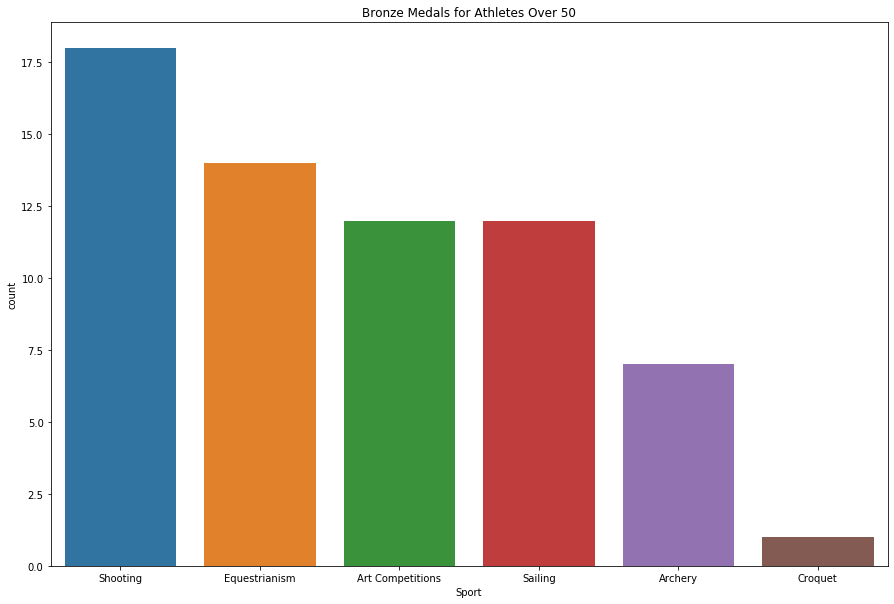

In [71]:
plt.figure(figsize = (15, 10))
plt.tight_layout()
sns.countplot(BronzeSport)
plt.title('Bronze Medals for Athletes Over 50')

# Women in Athletics

In [77]:
WomenInSummer = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

WomenInWinter = merged[(merged.Sex == 'F') & (merged.Season == 'Winter')]


In [78]:
WomenInSummer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN


Text(0.5, 1.0, 'Women medals per edition of the Games')

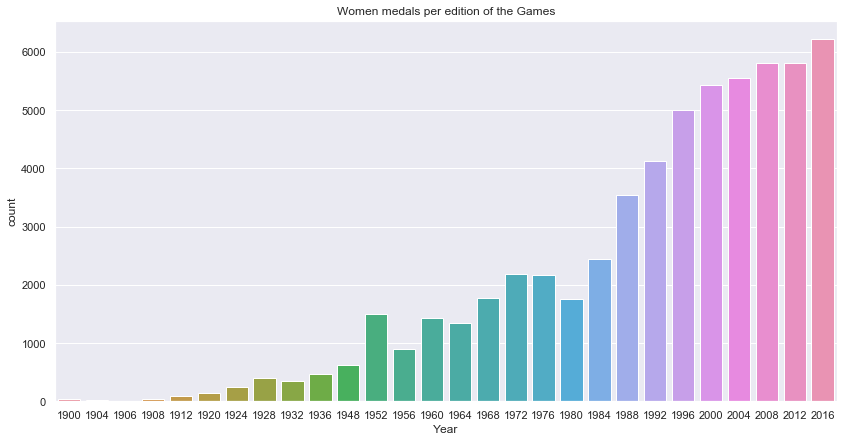

In [85]:
sns.set(style = "darkgrid")
plt.figure(figsize = (14, 7))
sns.countplot(x = 'Year', data = WomenInSummer)
plt.title('Women medals per edition Summer Olympic Games')

In [91]:
WomenInSummer['ID'].loc[WomenInSummer['Year'] == 1900].count()

33

In [81]:
WomenInWinter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


Text(0.5, 1.0, 'Women medals per edition Winter Olympic Games')

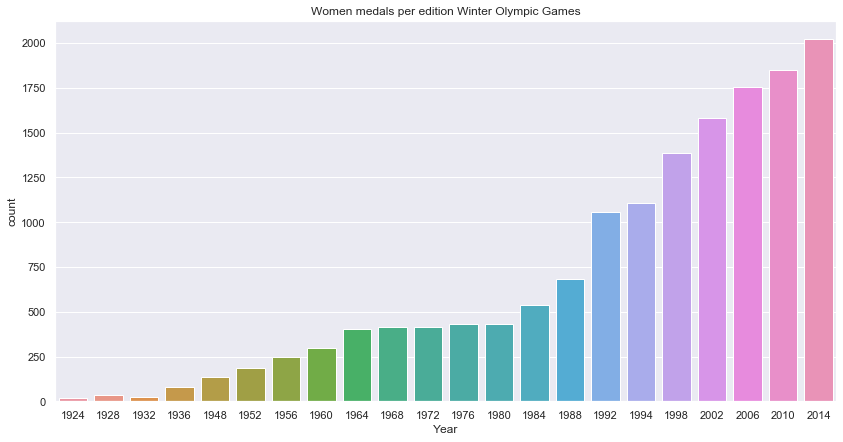

In [86]:
sns.set(style = "darkgrid")
plt.figure(figsize = (14, 7))
sns.countplot(x = 'Year', data = WomenInWinter)
plt.title('Women medals per edition Winter Olympic Games')

# Medals per country

In [94]:
Gold.region.value_counts().reset_index(name = 'Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1, 'Medals per Country')

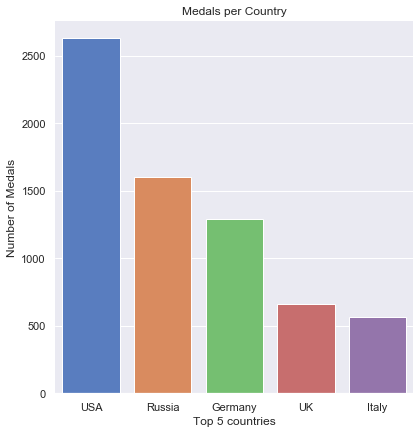

In [149]:
totalGoldMedals = Gold.region.value_counts().reset_index(name='Medal').head(5)

g = sns.catplot(x = "index", y = "Medal", data = totalGoldMedals,
                height = 6, kind = "bar", palette = "muted")
g.despine(left = True)

g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [97]:
#Disciplines with the greatest number of Gold Medals

In [98]:
GoldUSA = Gold.loc[Gold['NOC'] == 'USA']

In [100]:
GoldUSA.Event.value_counts().reset_index(name = 'Medal').head(20)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


In [101]:
basketballGoldUSA = GoldUSA.loc[(GoldUSA['Sport'] == 'Basketball') & (GoldUSA['Sex'] == 'M')].sort_values(['Year'])

In [102]:
basketballGoldUSA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


In [103]:
groupedBasketUSA = basketballGoldUSA.groupby(['Year']).first()
groupedBasketUSA

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,
1936,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1948,101443,"Robert Lloyd Jackson ""Jack"" Robinson",M,21.0,183.0,82.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1952,58738,"Robert Earl ""Bob"" Kenney",M,21.0,188.0,84.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1956,128271,"James Patrick ""Jim"" Walsh",M,26.0,193.0,86.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1960,13371,"Robert Lewis ""Bob"" Boozer",M,23.0,203.0,99.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1964,130843,"George ""Jiff"" Wilson",M,22.0,203.0,95.0,United States,USA,1964 Summer,Summer,Tokyo,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1968,8104,"Michael Thomas ""Mike"" Barrett",M,25.0,188.0,73.0,United States,USA,1968 Summer,Summer,Mexico City,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1976,65853,"Thomas Joseph ""Tom"" LaGarde",M,21.0,208.0,97.0,United States,USA,1976 Summer,Summer,Montreal,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1984,120501,Wayman Lawrence Tisdale,M,20.0,205.0,118.0,United States,USA,1984 Summer,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold,USA,NaN


In [104]:
groupedBasketUSA['ID'].count()

15

# What is the median height/weight of an Olympic medalist?

In [105]:
notnullGold = Gold[(Gold['Height'].notnull()) & (Gold['Weight'].notnull())]

In [107]:
notnullGold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10167 entries, 42 to 271076
Data columns (total 17 columns):
ID        10167 non-null int64
Name      10167 non-null object
Sex       10167 non-null object
Age       10167 non-null float64
Height    10167 non-null float64
Weight    10167 non-null float64
Team      10167 non-null object
NOC       10167 non-null object
Games     10167 non-null object
Year      10167 non-null int64
Season    10167 non-null object
City      10167 non-null object
Sport     10167 non-null object
Event     10167 non-null object
Medal     10167 non-null object
region    10166 non-null object
notes     143 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.4+ MB


Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

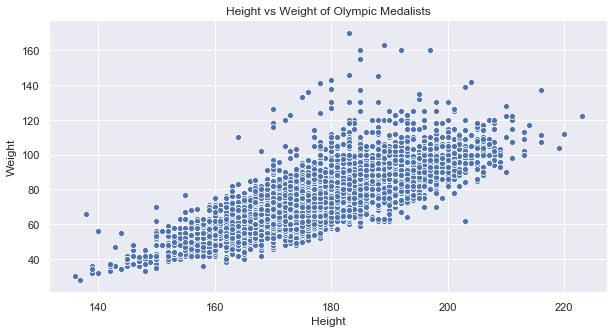

In [110]:
plt.figure(figsize = (10, 5))
ax = sns.scatterplot(x = "Height", y = "Weight", data = notnullGold)
plt.title('Height vs Weight of Olympic Medalists')

In [111]:
notnullGold.loc[notnullGold['Weight'] > 160]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


# Evolution of the Olympics over time

In [112]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

Text(0.5, 1.0, 'Variation of Male Athletes over time')

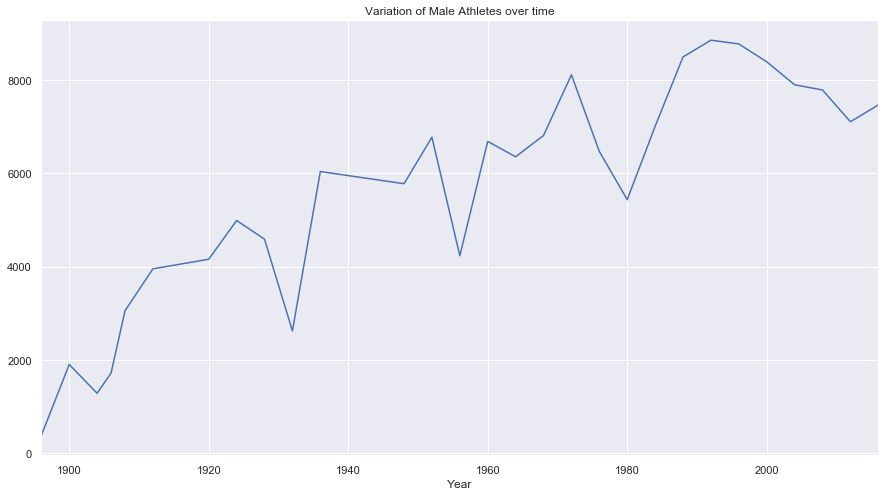

In [116]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize = (15, 8))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

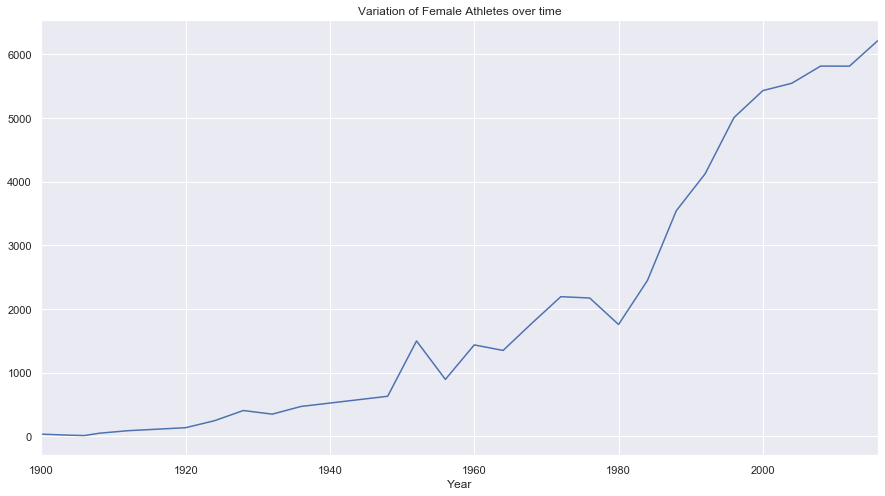

In [115]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize = (15, 8))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

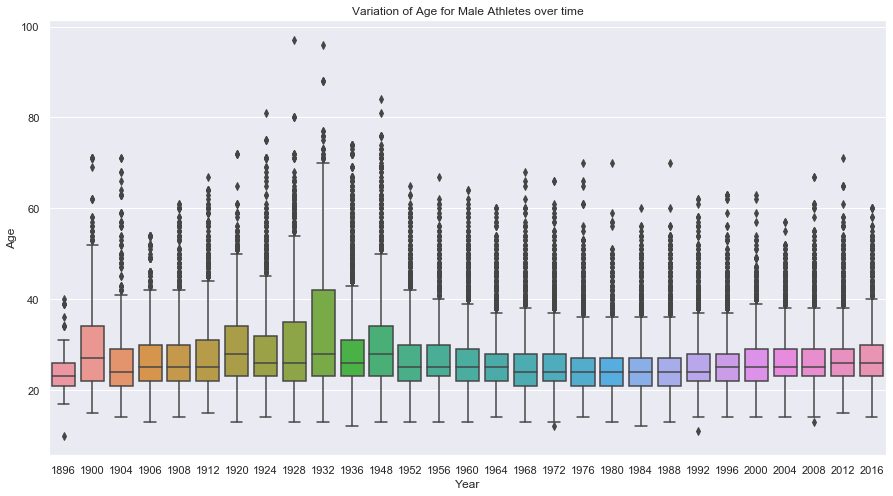

In [118]:
plt.figure(figsize = (15, 8))
sns.boxplot('Year', 'Age', data = MenOverTime)
plt.title('Variation of Age for Male Athletes over time')

In [119]:
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

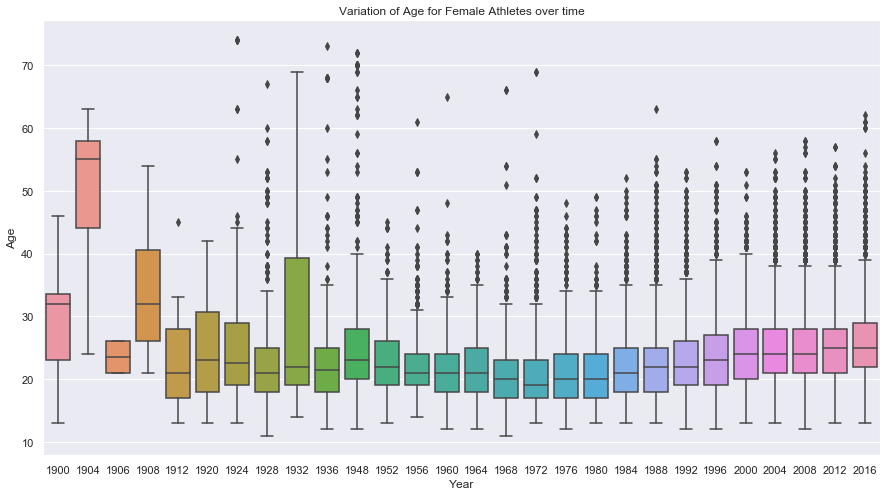

In [120]:
plt.figure(figsize=(15, 8))
sns.boxplot('Year', 'Age', data = WomenOverTime)
plt.title('Variation of Age for Female Athletes over time')

In [121]:
WomenOverTime.loc[WomenOverTime['Year'] == 1904]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44365,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
44366,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN
99506,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold,USA,NaN
99507,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold,USA,NaN
99508,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
190950,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze,USA,NaN
190951,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
237131,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN,USA,NaN
237132,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN,USA,NaN


Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time')

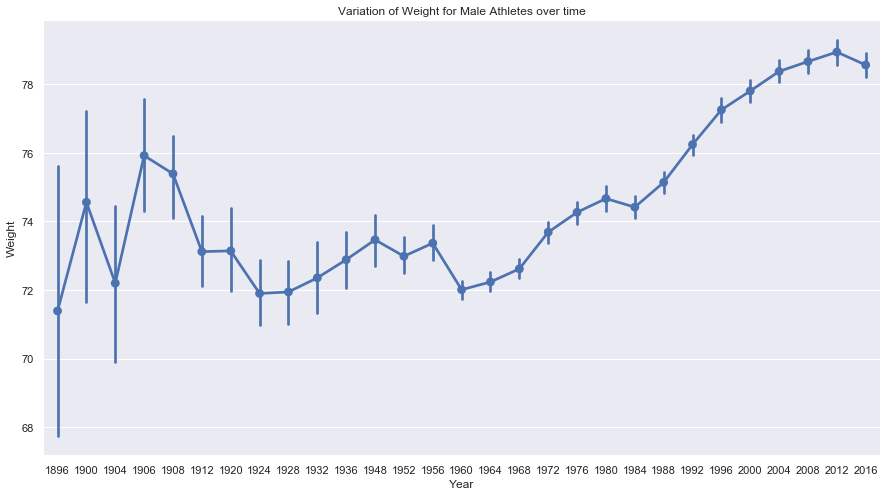

In [122]:
plt.figure(figsize = (15, 8))
sns.pointplot('Year', 'Weight', data = MenOverTime)
plt.title('Variation of Weight for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time')

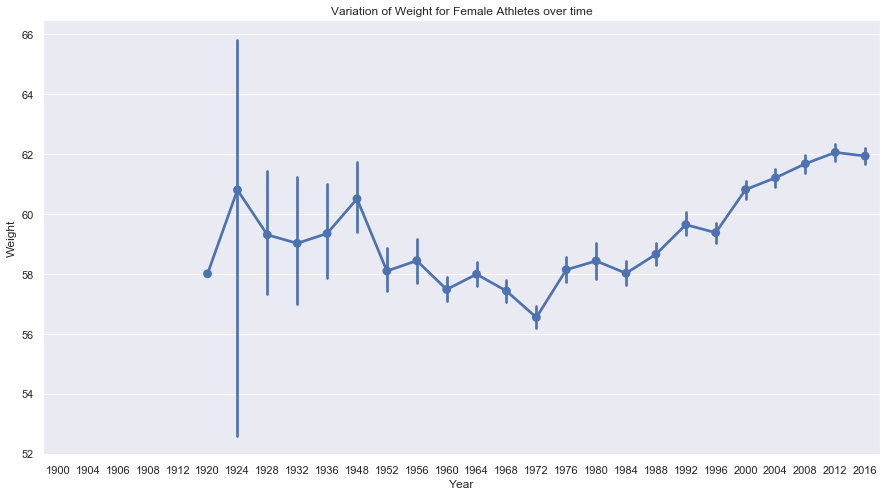

In [123]:
plt.figure(figsize=(15, 8))
sns.pointplot('Year', 'Weight', data = WomenOverTime)
plt.title('Variation of Weight for Female Athletes over time')

In [126]:
WomenInSummer.loc[WomenInSummer['Year'] < 1924].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN,Austria,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,Austria,NaN
1756,975,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-),F,39.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Tennis,"Tennis Women's Singles, Covered Courts",Bronze,Sweden,NaN


Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

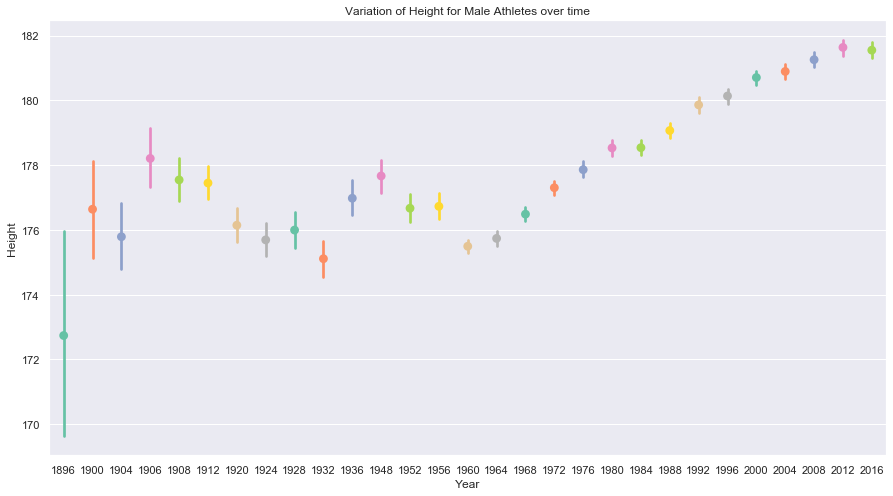

In [127]:
plt.figure(figsize = (15, 8))
sns.pointplot('Year', 'Height', data = MenOverTime, palette = 'Set2')
plt.title('Variation of Height for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Height for Female Athletes over time')

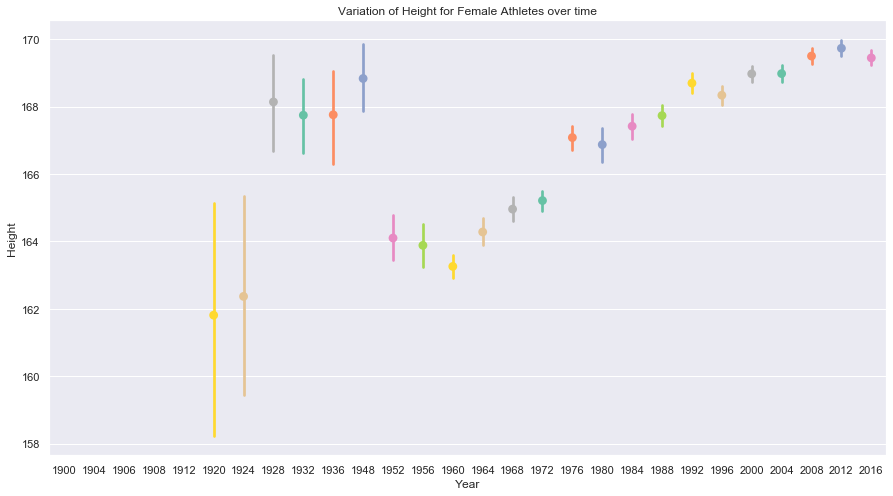

In [128]:
plt.figure(figsize = (15, 8))
sns.pointplot('Year', 'Height', data = WomenOverTime, palette = 'Set2')
plt.title('Variation of Height for Female Athletes over time')

In [129]:
WomenOverTime.loc[(WomenOverTime['Year'] > 1924) & (WomenOverTime['Year'] < 1952)].head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN


In [130]:
MenOverTime['Sport'].unique().tolist()

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Swimming',
 'Badminton',
 'Gymnastics',
 'Athletics',
 'Art Competitions',
 'Wrestling',
 'Water Polo',
 'Sailing',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Weightlifting',
 'Diving',
 'Canoeing',
 'Handball',
 'Tennis',
 'Modern Pentathlon',
 'Hockey',
 'Volleyball',
 'Baseball',
 'Table Tennis',
 'Archery',
 'Trampolining',
 'Beach Volleyball',
 'Golf',
 'Rugby Sevens',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [ ]:
#Gymnastics

In [131]:
gymMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Gymnastics']
gymWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Gymnastics']

Text(0.5, 1.0, 'Weight over year for Male Gymnasts')

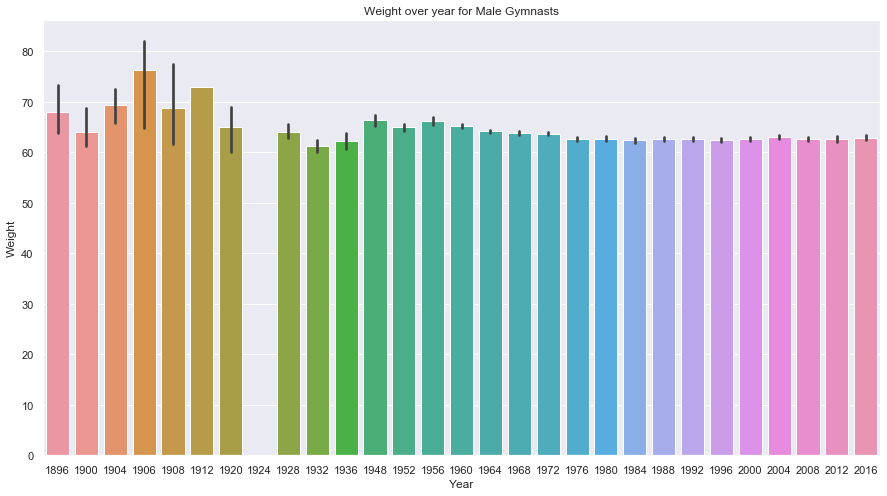

In [136]:
plt.figure(figsize=(15, 8))
sns.barplot('Year', 'Weight', data = gymMenOverTime)
plt.title('Weight over year for Male Gymnasts')

Text(0.5, 1.0, 'Height over year for Male Gymnasts')

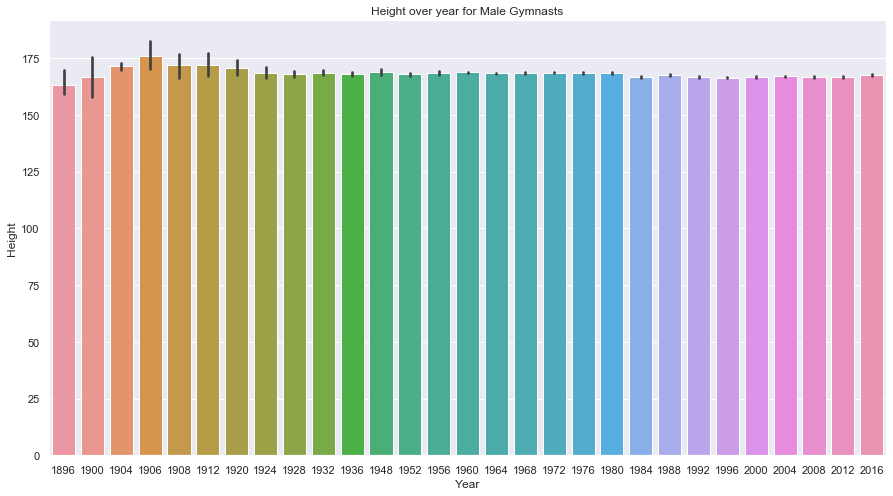

In [137]:
plt.figure(figsize=(15, 8))
sns.barplot('Year', 'Height', data = gymMenOverTime)
plt.title('Height over year for Male Gymnasts')

Text(0.5, 1.0, 'Weight over year for Female Gymnasts')

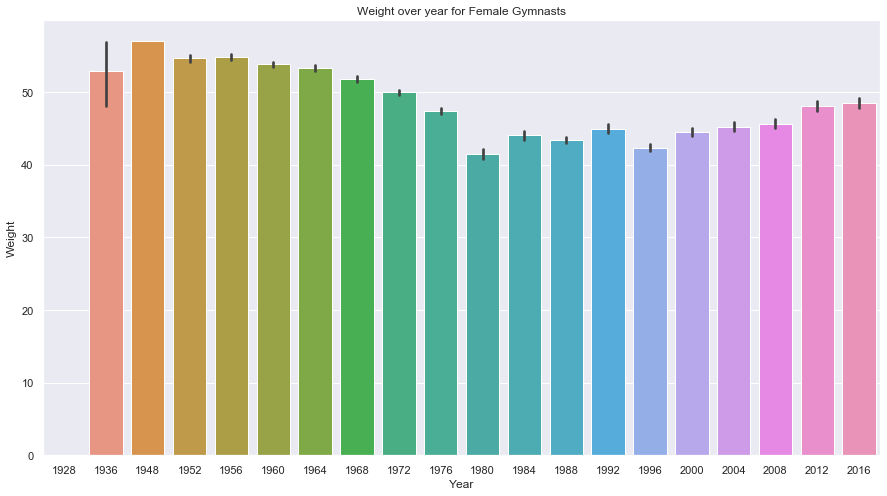

In [138]:
plt.figure(figsize=(15, 8))
sns.barplot('Year', 'Weight', data=gymWomenOverTime)
plt.title('Weight over year for Female Gymnasts')

Text(0.5, 1.0, 'Height over year for Female Gymnasts')

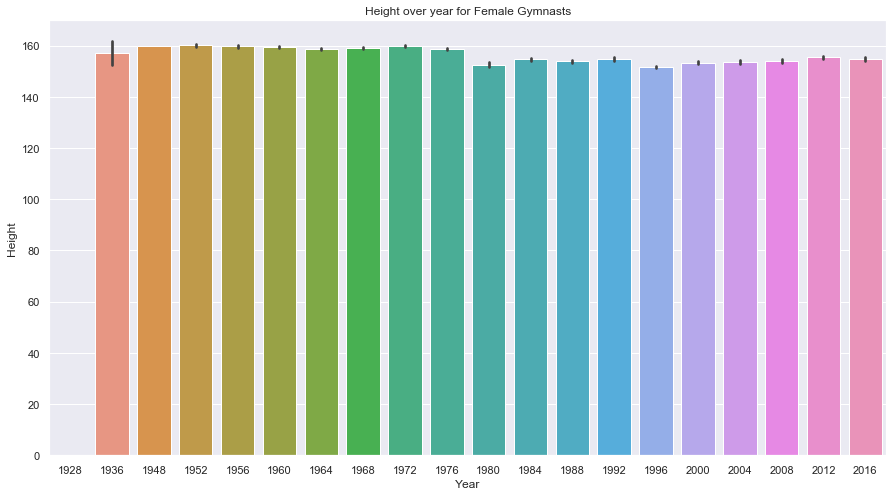

In [139]:
plt.figure(figsize=(15, 8))
sns.barplot('Year', 'Height', data = gymWomenOverTime)
plt.title('Height over year for Female Gymnasts')

In [141]:
#Weightlifting

In [142]:
wlMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Weightlifting']
wlWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Weightlifting']

Text(0.5, 1.0, 'Weight over year for Male Lifters')

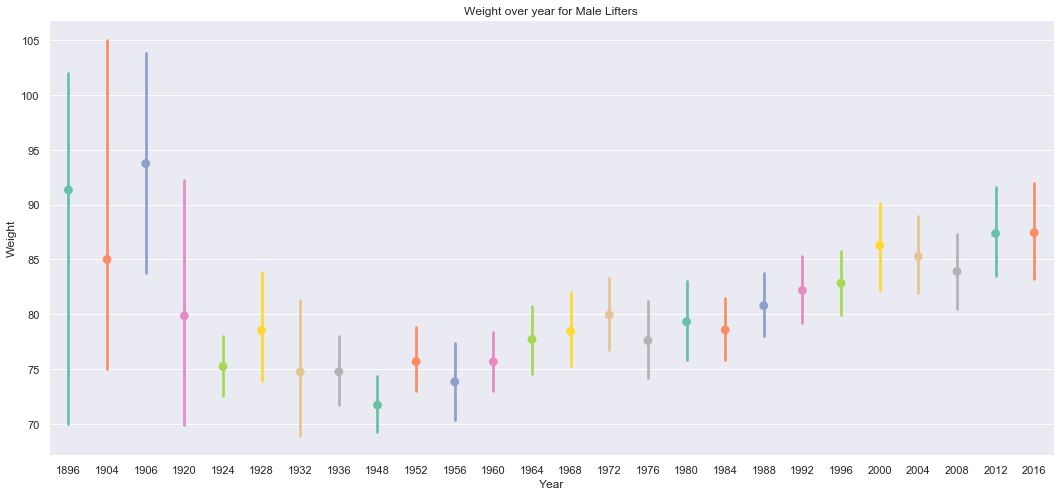

In [143]:
plt.figure(figsize = (18, 8))
sns.pointplot('Year', 'Weight', data = wlMenOverTime, palette = 'Set2')
plt.title('Weight over year for Male Lifters')

Text(0.5, 1.0, 'Height over year for Male Lifters')

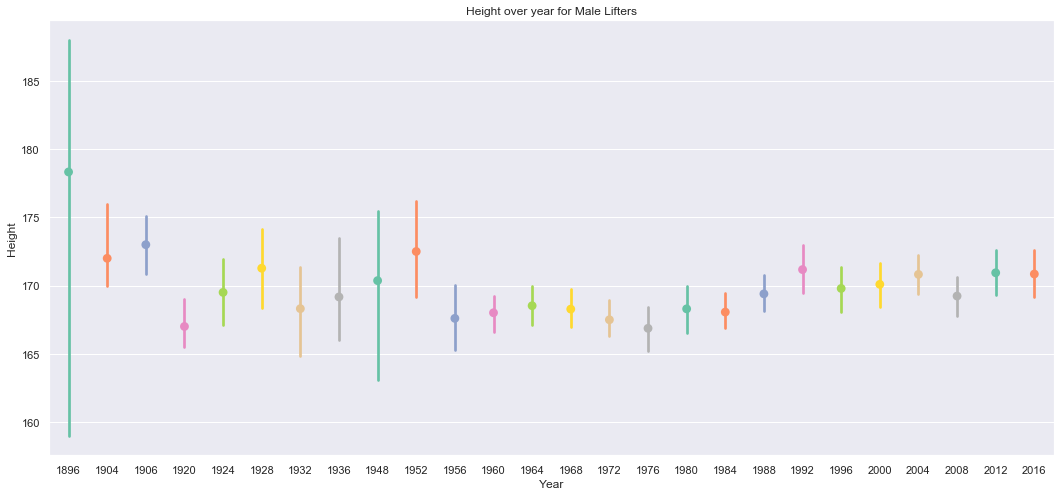

In [144]:
plt.figure(figsize = (18, 8))
sns.pointplot('Year', 'Height', data = wlMenOverTime, palette = 'Set2')
plt.title('Height over year for Male Lifters')

Text(0.5, 1.0, 'Weight over year for Female Lifters')

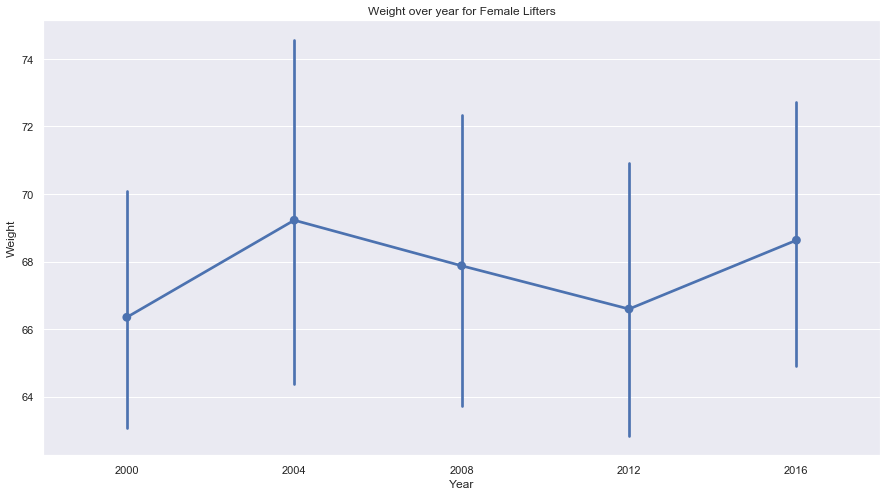

In [145]:
plt.figure(figsize = (15, 8))
sns.pointplot('Year', 'Weight', data = wlWomenOverTime)
plt.title('Weight over year for Female Lifters')

Text(0.5, 1.0, 'Height over year for Female Lifters')

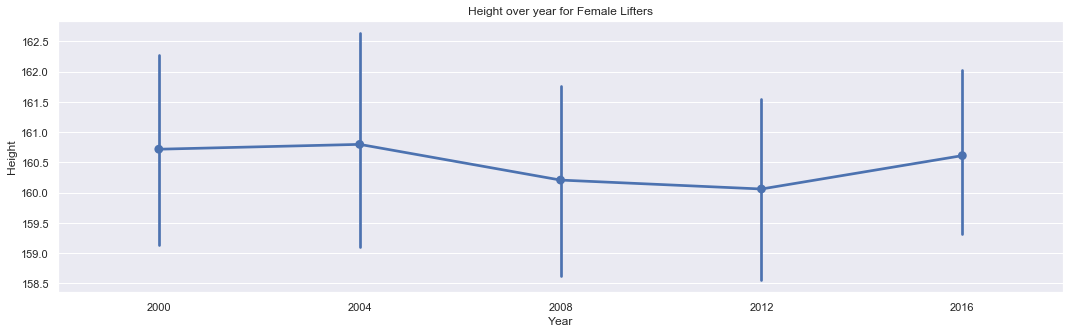

In [146]:
plt.figure(figsize = (18, 5))
sns.pointplot('Year', 'Height', data = wlWomenOverTime)
plt.title('Height over year for Female Lifters')